<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

In [194]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

#File Read
import json

#Regex
import re

# apply some cool styling
plt.style.use("ggplot")
from pylab import rcParams
rcParams['figure.figsize'] = (12,  6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Set it None to display all rows in the dataframe
#pd.set_option('display.max_rows', None)


import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

## Missing Values

In [195]:
df = pd.read_csv('scoutPART2-TypesandDuplicates.csv')

In [196]:
df.head()

,make_model,body_type,price,vat,km,registration,prev_owner,hp,type,previous_owners,inspection_new,warranty,non_smoking_vehicle,offer_number,first_registration,body_color,paint_type,body_color_original,upholstery,body,nr_of_doors,nr_of_seats,gearing_type,displacement,cylinders,weight,drive_chain,fuel,consumption,co_2_emission,emission_class,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,last_service_date,availability,age
0,Audi A1,Sedans,15770,VAT deductible,56013,1461 days,2.000,66.000,Used,2.000,True,NaN,NaN,LR-062483,2016.000,Black,Metallic,Mythosschwarz,"Cloth, Black",Sedans,5.000,5.000,Automatic,1422.000,3.000,1220.000,front,Benzine,3.800,99,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...","Sicherheit:, ,Deaktivierung für Beifahrer-Airb...",NaN,NaN,NaN,NaN,NaN,4.000
1,Audi A1,Sedans,14500,Price negotiable,80000,1036 days,NaN,141.000,Used,NaN,NaN,NaN,NaN,NaN,2017.000,Red,NaN,NaN,"Cloth, Grey",Sedans,3.000,4.000,Automatic,1798.000,4.000,1255.000,front,Benzine,5.600,129,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Langstreckenfahrzeug daher die hohe Kilometerl...,4.000,7.000,NaN,NaN,NaN,3.000
2,Audi A1,Sedans,14640,VAT deductible,83450,1430 days,1.000,85.000,Used,1.000,NaN,NaN,NaN,AM-95365,2016.000,Black,Metallic,mythosschwarz metallic,"Cloth, Black",Sedans,4.000,4.000,Automatic,1598.000,NaN,NaN,front,Benzine,3.800,99,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...","Fahrzeug-Nummer: AM-95365, ,Ehem. UPE 24.640 E...",4.000,NaN,NaN,NaN,NaN,4.000
3,Audi A1,Sedans,14500,NaN,73000,1248 days,1.000,66.000,Used,1.000,NaN,NaN,6,NaN,2016.000,Brown,Metallic,NaN,NaN,Sedans,3.000,4.000,Automatic,1422.000,3.000,1195.000,NaN,Benzine,3.800,99,Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...","Audi A1: ,- 1e eigenaar ,- Perfecte staat: sch...",NaN,6.000,NaN,NaN,NaN,4.000
4,Audi A1,Sedans,16790,NaN,16200,1340 days,1.000,66.000,Used,1.000,True,NaN,NaN,C1626,2016.000,Black,Metallic,Mythosschwarz Metallic,"Cloth, Black",Sedans,5.000,5.000,Automatic,1422.000,3.000,NaN,front,Benzine,4.100,109,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...","Technik & Sicherheit:,Xenon plus,Klimaautomati...",NaN,NaN,Germany,NaN,NaN,4.000


In [197]:
df.tail()

,make_model,body_type,price,vat,km,registration,prev_owner,hp,type,previous_owners,inspection_new,warranty,non_smoking_vehicle,offer_number,first_registration,body_color,paint_type,body_color_original,upholstery,body,nr_of_doors,nr_of_seats,gearing_type,displacement,cylinders,weight,drive_chain,fuel,consumption,co_2_emission,emission_class,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,last_service_date,availability,age
15914,Renault Espace,Van,39950,VAT deductible,0,NaN,NaN,147.000,New,NaN,NaN,24.000,NaN,10988301,NaN,Grey,Metallic,Grigio scuro,NaN,Van,5.000,5.000,Automatic,1997.000,4.000,1758.000,front,Benzine,5.300,139,NaN,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",Vettura visionabile nella sede in Via Roma 141...,NaN,6.000,NaN,NaN,NaN,0.000
15915,Renault Espace,Van,39885,VAT deductible,9900,365 days,1.000,165.000,Used,1.000,NaN,NaN,4,507370_3223,2019.000,Grey,Metallic,Stahl-Grau Metallic,Cloth,Van,5.000,5.000,Automatic,1798.000,4.000,1708.000,front,Benzine,NaN,168,NaN,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...","Dach: Panorama-Glas-Schiebedach, Lackierung: M...",NaN,7.000,Germany,NaN,5.000,1.000
15916,Renault Espace,Van,39875,VAT deductible,15,306 days,1.000,146.000,Pre-registered,1.000,True,NaN,NaN,Espace16,2019.000,White,NaN,arktis-weiß,"Full leather, Black",Van,5.000,7.000,Automatic,1997.000,4.000,NaN,front,Diesel,5.300,139,Euro 6d-TEMP,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...","Getriebe:, Automatik,Technik:, Bordcomputer,As...",NaN,6.000,Austria,NaN,120.000,1.000
15917,Renault Espace,Van,39700,VAT deductible,10,214 days,NaN,147.000,Pre-registered,NaN,NaN,NaN,NaN,2691331,2019.000,Grey,NaN,Grigio,Part leather,Van,5.000,7.000,Automatic,1997.000,4.000,1758.000,front,Diesel,5.300,139,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...","DEK:[2691331],Renault Espace Blue dCi 200CV ED...",NaN,6.000,NaN,NaN,NaN,1.000
15918,Renault Espace,Van,40999,VAT deductible,0,365 days,1.000,165.000,Demonstration,1.000,True,NaN,NaN,Re_30000008029,2019.000,Grey,Metallic,Titanium-Grau Metallic,"Full leather, Brown",Van,5.000,5.000,Automatic,1798.000,4.000,1685.000,4WD,Benzine,6.800,153,Euro 6,"Air conditioning,Automatic climate control,Cru...",USB,"Alloy wheels,Touch screen","ABS,Blind spot monitor,Daytime running lights,...","Sicherheit Airbags:, ,Seitenairbag, ,Fahrerair...",4.000,NaN,Germany,NaN,NaN,1.000


In [198]:
df.sample()

,make_model,body_type,price,vat,km,registration,prev_owner,hp,type,previous_owners,inspection_new,warranty,non_smoking_vehicle,offer_number,first_registration,body_color,paint_type,body_color_original,upholstery,body,nr_of_doors,nr_of_seats,gearing_type,displacement,cylinders,weight,drive_chain,fuel,consumption,co_2_emission,emission_class,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,last_service_date,availability,age
3491,Audi A3,Sedans,15700,VAT deductible,89991,1064 days,1.000,81.000,Used,1.000,NaN,NaN,6,NaN,2017.000,Silver,Metallic,Florettsilber Metallic,"Cloth, Black",Sedans,4.000,5.000,Manual,1598.000,NaN,NaN,front,Benzine,4.100,108,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...","WAUZZZ8V8H1051489,Ablage- und Gepäckraum-Paket...",4.000,6.000,NaN,NaN,NaN,3.000


## ----------------------------------------------------------------

## All Missing-Value Columns

In [199]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'registration',
       'prev_owner', 'hp', 'type', 'previous_owners', 'inspection_new',
       'warranty', 'non_smoking_vehicle', 'offer_number', 'first_registration',
       'body_color', 'paint_type', 'body_color_original', 'upholstery', 'body',
       'nr_of_doors', 'nr_of_seats', 'gearing_type', 'displacement',
       'cylinders', 'weight', 'drive_chain', 'fuel', 'consumption',
       'co_2_emission', 'emission_class', 'comfort_&_convenience',
       'entertainment_&_media', 'extras', 'safety_&_security', 'description',
       'emission_label', 'gears', 'country_version', 'last_service_date',
       'availability', 'age'],
      dtype='object')

### 0- 'body_type'

In [200]:
#df['body_type']    % 0.3  DROP ROWS!!!

In [201]:
df.shape

(15919, 42)

In [202]:
df= df.dropna(subset=['body_type'])
df.head()

,make_model,body_type,price,vat,km,registration,prev_owner,hp,type,previous_owners,inspection_new,warranty,non_smoking_vehicle,offer_number,first_registration,body_color,paint_type,body_color_original,upholstery,body,nr_of_doors,nr_of_seats,gearing_type,displacement,cylinders,weight,drive_chain,fuel,consumption,co_2_emission,emission_class,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,last_service_date,availability,age
0,Audi A1,Sedans,15770,VAT deductible,56013,1461 days,2.000,66.000,Used,2.000,True,NaN,NaN,LR-062483,2016.000,Black,Metallic,Mythosschwarz,"Cloth, Black",Sedans,5.000,5.000,Automatic,1422.000,3.000,1220.000,front,Benzine,3.800,99,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...","Sicherheit:, ,Deaktivierung für Beifahrer-Airb...",NaN,NaN,NaN,NaN,NaN,4.000
1,Audi A1,Sedans,14500,Price negotiable,80000,1036 days,NaN,141.000,Used,NaN,NaN,NaN,NaN,NaN,2017.000,Red,NaN,NaN,"Cloth, Grey",Sedans,3.000,4.000,Automatic,1798.000,4.000,1255.000,front,Benzine,5.600,129,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Langstreckenfahrzeug daher die hohe Kilometerl...,4.000,7.000,NaN,NaN,NaN,3.000
2,Audi A1,Sedans,14640,VAT deductible,83450,1430 days,1.000,85.000,Used,1.000,NaN,NaN,NaN,AM-95365,2016.000,Black,Metallic,mythosschwarz metallic,"Cloth, Black",Sedans,4.000,4.000,Automatic,1598.000,NaN,NaN,front,Benzine,3.800,99,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...","Fahrzeug-Nummer: AM-95365, ,Ehem. UPE 24.640 E...",4.000,NaN,NaN,NaN,NaN,4.000
3,Audi A1,Sedans,14500,NaN,73000,1248 days,1.000,66.000,Used,1.000,NaN,NaN,6,NaN,2016.000,Brown,Metallic,NaN,NaN,Sedans,3.000,4.000,Automatic,1422.000,3.000,1195.000,NaN,Benzine,3.800,99,Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...","Audi A1: ,- 1e eigenaar ,- Perfecte staat: sch...",NaN,6.000,NaN,NaN,NaN,4.000
4,Audi A1,Sedans,16790,NaN,16200,1340 days,1.000,66.000,Used,1.000,True,NaN,NaN,C1626,2016.000,Black,Metallic,Mythosschwarz Metallic,"Cloth, Black",Sedans,5.000,5.000,Automatic,1422.000,3.000,NaN,front,Benzine,4.100,109,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...","Technik & Sicherheit:,Xenon plus,Klimaautomati...",NaN,NaN,Germany,NaN,NaN,4.000


In [203]:
df.shape

(15859, 42)

### 1 - 'vat'

In [204]:
#'vat' %30

In [205]:
df['vat'].sample(10)

8810     VAT deductible
5257     VAT deductible
3505                NaN
10660    VAT deductible
232                 NaN
13263               NaN
10311    VAT deductible
15398    VAT deductible
1953     VAT deductible
2843     VAT deductible
Name: vat, dtype: object

In [206]:
df['vat'].value_counts()

VAT deductible      10961
Price negotiable      425
Name: vat, dtype: int64

In [207]:
# from sklearn import preprocessing  (null ları da encode ettiğinden burada kullanılmadı)

# lab_encoder = preprocessing.LabelEncoder()
# df_['vat'] = lab_encoder.fit_transform(df_['vat'])
# df_['vat']

In [208]:
df['vat'].replace(['VAT deductible','Price negotiable'],[1,2])

0       1.000
1       2.000
2       1.000
3         NaN
4         NaN
         ... 
15914   1.000
15915   1.000
15916   1.000
15917   1.000
15918   1.000
Name: vat, Length: 15859, dtype: float64

In [209]:
df['vat'].value_counts()

VAT deductible      10961
Price negotiable      425
Name: vat, dtype: int64

In [210]:
df['vat'].isnull().sum()

4473

### 2 -'prev_owner'

In [211]:
#'prev_owner'  # %43  

In [212]:
df[['prev_owner', 'previous_owners']].value_counts(dropna=False)

prev_owner  previous_owners
1.000       1.000              8286
NaN         NaN                6589
2.000       2.000               777
NaN         0.000               188
3.000       3.000                17
4.000       4.000                 2
dtype: int64

In [213]:
df['prev_owner'].isnull().sum()

6777

In [214]:
df['prev_owner'].fillna(df['previous_owners'])

0       2.000
1         NaN
2       1.000
3       1.000
4       1.000
         ... 
15914     NaN
15915   1.000
15916   1.000
15917     NaN
15918   1.000
Name: prev_owner, Length: 15859, dtype: float64

In [215]:
df['prev_owner'].isnull().sum()

6777

In [216]:
to_drop = ['previous_owners']
df.drop(to_drop, inplace = True, axis = 1)

In [217]:
df.shape

(15859, 41)

### 3 - 'type' 

In [218]:
#'type'  (sadece 2)  DROP ROWS!!!

In [219]:
df['type'].value_counts()

Used              11042
New                1648
Pre-registered     1360
Employee's car     1011
Demonstration       796
Name: type, dtype: int64

In [220]:
df['type'].replace(['Used','New', 'Pre-registered', "Employee's car", 'Demonstration'],[1,2,3,4,5])
df['type']

0                  Used
1                  Used
2                  Used
3                  Used
4                  Used
              ...      
15914               New
15915              Used
15916    Pre-registered
15917    Pre-registered
15918     Demonstration
Name: type, Length: 15859, dtype: object

### 4 -'next_inspection' DROPPED

In [221]:
# 'next_inspection' % 77

In [222]:
# #ilan zamanıyla farkını al
# df['today'] = '2019-01-01'
# df['today'] = pd.to_datetime(df['today'])

In [223]:
# df['next_inspection']

In [224]:
# df['next_inspection'] = pd.to_datetime(df['next_inspection'], format='%Y/%m/%d')

In [225]:
# df['next_inspection_DAYS'] = abs(df['today'] - df['next_inspection'])

In [226]:
# df['next_inspection_DAYS']

In [227]:
# to_drop = ['next_inspection']
# df.drop(to_drop, inplace = True, axis = 1)

### 5 - 'inspection_new'

In [228]:
# 'inspection_new'   % 75

### 6 - 'warranty'

In [229]:
# 'warranty' % 70

###  7 - 'non_smoking_vehicle' - DROPPED

In [230]:
#'non_smoking_vehicle'   % 78

In [231]:
df[['non_smoking_vehicle', 'consumption']].sample(15)

,non_smoking_vehicle,consumption
1445,NaN,NaN
15134,NaN,NaN
2004,NaN,4.800
13881,NaN,4.700
3049,NaN,3.800
2801,NaN,10.000
3236,NaN,4.700
13745,NaN,3.300
6127,NaN,NaN
11679,NaN,3.900


In [232]:
to_drop = ['non_smoking_vehicle']
df.drop(to_drop, inplace = True, axis = 1)

In [233]:
df.shape

(15859, 40)

### 8 - 'offer_number' DROPPED

In [234]:
# 'offer_number'  % 20

In [235]:
df['offer_number']

0             LR-062483
1                   NaN
2              AM-95365
3                   NaN
4                 C1626
              ...      
15914          10988301
15915       507370_3223
15916          Espace16
15917           2691331
15918    Re_30000008029
Name: offer_number, Length: 15859, dtype: object

In [236]:
to_drop = ['offer_number']
df.drop(to_drop, inplace = True, axis = 1)

In [237]:
df.shape

(15859, 39)

### 9 - 'first_registration'

In [238]:
# 'first_registration'   %10

In [239]:
df['first_registration'].value_counts()


2018.000    4508
2016.000    3663
2017.000    3253
2019.000    2850
Name: first_registration, dtype: int64

In [240]:
df['first_registration'].isnull().sum()

1585

In [241]:
df.shape

(15859, 39)

### 10 - 'body_color'

In [242]:
# 'body_color'   %10

### 11 - 'paint_type'

In [243]:
# 'paint_type'   % 36

### 12 - 'body_color_original'

In [244]:
# 'body_color_original'   % 24

### 13 - 'upholstery'

In [245]:
# 'upholstery'   % 23

In [246]:
df['upholstery'].head(1)

0    Cloth, Black
Name: upholstery, dtype: object

In [247]:
df['upholstery'] = df['upholstery'].str.split(',')
df['upholstery'] = df['upholstery'].apply(lambda x: x[0] if type(x) == list else x)

In [248]:
df['upholstery'].replace(to_replace= ['Black', 'Grey', 'Brown', 'Beige', 'Blue', 'White'], value=np.nan, inplace=True)
df['upholstery']

0               Cloth
1               Cloth
2               Cloth
3                 NaN
4               Cloth
             ...     
15914             NaN
15915           Cloth
15916    Full leather
15917    Part leather
15918    Full leather
Name: upholstery, Length: 15859, dtype: object

In [249]:
df['upholstery'].value_counts()

Cloth           8417
Part leather    1499
Full leather    1007
Other            368
Velour            60
alcantara         57
Name: upholstery, dtype: int64

In [250]:
df['upholstery'].replace(['Black','Grey', 'Brown', "Beige", 'Blue', 'White'], np.nan)
df['upholstery']

0               Cloth
1               Cloth
2               Cloth
3                 NaN
4               Cloth
             ...     
15914             NaN
15915           Cloth
15916    Full leather
15917    Part leather
15918    Full leather
Name: upholstery, Length: 15859, dtype: object

In [251]:
df['upholstery'].value_counts()

Cloth           8417
Part leather    1499
Full leather    1007
Other            368
Velour            60
alcantara         57
Name: upholstery, dtype: int64

### 14 - 'body'- DROPPED (body_type stays)

In [252]:
# 'body'  (60 tane)              DROP ROWS!!!

In [253]:
df[['body', 'body_type']].isnull().sum()

body         0
body_type    0
dtype: int64

In [254]:
to_drop = ['body']
df.drop(to_drop, inplace = True, axis = 1)

In [255]:
df.shape

(15859, 38)

In [256]:
df = df.dropna(subset=['body_type'])
df.head()

,make_model,body_type,price,vat,km,registration,prev_owner,hp,type,inspection_new,warranty,first_registration,body_color,paint_type,body_color_original,upholstery,nr_of_doors,nr_of_seats,gearing_type,displacement,cylinders,weight,drive_chain,fuel,consumption,co_2_emission,emission_class,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,last_service_date,availability,age
0,Audi A1,Sedans,15770,VAT deductible,56013,1461 days,2.000,66.000,Used,True,NaN,2016.000,Black,Metallic,Mythosschwarz,Cloth,5.000,5.000,Automatic,1422.000,3.000,1220.000,front,Benzine,3.800,99,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...","Sicherheit:, ,Deaktivierung für Beifahrer-Airb...",NaN,NaN,NaN,NaN,NaN,4.000
1,Audi A1,Sedans,14500,Price negotiable,80000,1036 days,NaN,141.000,Used,NaN,NaN,2017.000,Red,NaN,NaN,Cloth,3.000,4.000,Automatic,1798.000,4.000,1255.000,front,Benzine,5.600,129,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Langstreckenfahrzeug daher die hohe Kilometerl...,4.000,7.000,NaN,NaN,NaN,3.000
2,Audi A1,Sedans,14640,VAT deductible,83450,1430 days,1.000,85.000,Used,NaN,NaN,2016.000,Black,Metallic,mythosschwarz metallic,Cloth,4.000,4.000,Automatic,1598.000,NaN,NaN,front,Benzine,3.800,99,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...","Fahrzeug-Nummer: AM-95365, ,Ehem. UPE 24.640 E...",4.000,NaN,NaN,NaN,NaN,4.000
3,Audi A1,Sedans,14500,NaN,73000,1248 days,1.000,66.000,Used,NaN,NaN,2016.000,Brown,Metallic,NaN,NaN,3.000,4.000,Automatic,1422.000,3.000,1195.000,NaN,Benzine,3.800,99,Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...","Audi A1: ,- 1e eigenaar ,- Perfecte staat: sch...",NaN,6.000,NaN,NaN,NaN,4.000
4,Audi A1,Sedans,16790,NaN,16200,1340 days,1.000,66.000,Used,True,NaN,2016.000,Black,Metallic,Mythosschwarz Metallic,Cloth,5.000,5.000,Automatic,1422.000,3.000,NaN,front,Benzine,4.100,109,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...","Technik & Sicherheit:,Xenon plus,Klimaautomati...",NaN,NaN,Germany,NaN,NaN,4.000


In [257]:
df.shape

(15859, 38)

### 15 - 'nr_of_doors' 

In [258]:
# 'nr_of_doors'  % 1 (212)      DROP ROWS!!!

In [259]:
df.shape

(15859, 38)

In [260]:
df = df.dropna(subset=['nr_of_doors'])

In [261]:
df.shape

(15648, 38)

### 16 - 'nr_of_seats'

In [262]:
# 'nr_of_seats'   %6

### 17 - 'model_code' DROPPED

In [263]:
# 'model_code'  %69  #dropped in earlier FILE

In [264]:
# to_drop = ['model_code']
# df.drop(to_drop, inplace = True, axis = 1)

### 18 - 'displacement' 

In [265]:
# 'displacement'  %3

### 19 - 'cylinders'

In [266]:
# 'cylinders'   %36

### 20 - 'weight' 

In [267]:
# 'weight'   %44

### 21 - 'drive_chain'

In [268]:
# 'drive_chain' %43

### 22 - 'consumption'

In [269]:
# 'consumption'   %18

In [270]:
df['consumption'].value_counts().sample(20)

7.100      38
55.000      1
3.700     366
6.000     278
7.000       9
4.900     346
50.000      1
3.300     306
4.600     401
4.200     407
38.000      2
33.000      1
11.000      1
3.200      25
7.500       1
3.500     288
1.200       1
46.000      1
8.600       3
4.300     295
Name: consumption, dtype: int64

In [271]:
df.loc[df['consumption'] == 50.000, 'consumption'] = 5.0
df.loc[df['consumption'] == 33.000, 'consumption'] = 3.3
df.loc[df['consumption'] == 46.000, 'consumption'] = 4.6
df.loc[df['consumption'] == 55.000, 'consumption'] = 5.5
df.loc[df['consumption'] == 32.000, 'consumption'] = 3.2
df.loc[df['consumption'] == 54.000, 'consumption'] = 5.4
df.loc[df['consumption'] == 43.000, 'consumption'] = 4.3
df.loc[df['consumption'] == 40.000, 'consumption'] = 4.0
df.loc[df['consumption'] == 38.000, 'consumption'] = 3.8

### 23 - 'co_2_emission' 

In [272]:
# 'co_2_emission'  % 15

### 24 - 'emission_class'

In [273]:
# 'emission_class' %23

### 25 - 'comfort_&_convenience' 

In [274]:
# 'comfort_&_convenience'   %6

In [275]:
df["number_of_comfort_convenience"] = df["comfort_&_convenience"].str.count(r"\,")
df["number_of_comfort_convenience"] = df["number_of_comfort_convenience"] +1
df["number_of_comfort_convenience"]

0       16.000
1        9.000
2       13.000
3       16.000
4       13.000
         ...  
15914   20.000
15915   23.000
15916   24.000
15917   10.000
15918   11.000
Name: number_of_comfort_convenience, Length: 15648, dtype: float64

### 26 - 'entertainment_&_media'

In [276]:
# 'entertainment_&_media'  %9

In [277]:
df["number_of_entertainment_media"] = df["entertainment_&_media"].str.count(r"\,")
df["number_of_entertainment_media"] = df["number_of_entertainment_media"] +1
df["number_of_entertainment_media"]

0       4.000
1       5.000
2       2.000
3       8.000
4       7.000
         ... 
15914   6.000
15915   5.000
15916   4.000
15917   4.000
15918   1.000
Name: number_of_entertainment_media, Length: 15648, dtype: float64

### 27 - 'extras' 

In [278]:
# 'extras'   %19

In [279]:
df["number_of_extras"] = df["extras"].str.count(r"\,")
df["number_of_extras"] = df["number_of_extras"] +1
df["number_of_extras"]

0       3.000
1       4.000
2       2.000
3       3.000
4       4.000
         ... 
15914   2.000
15915   3.000
15916   1.000
15917   2.000
15918   2.000
Name: number_of_extras, Length: 15648, dtype: float64

### 28 - 'safety_&_security' 

In [280]:
# 'safety_&_security'  %6

In [281]:
df["number_of_safety_security"] = df["safety_&_security"].str.count(r"\,")
df["number_of_safety_security"] = df["number_of_safety_security"] +1
df["number_of_safety_security"]

0       14.000
1       15.000
2       12.000
3       14.000
4       13.000
         ...  
15914   19.000
15915   19.000
15916   18.000
15917   12.000
15918   14.000
Name: number_of_safety_security, Length: 15648, dtype: float64

### 29 - 'description' 

In [282]:
# 'description'  %4

### 30 - 'emission_label'

In [283]:
# 'emission_label'  %75

### 31 - 'gears' 

In [284]:
# 'gears'  %30

In [285]:
df['gears'].value_counts()

6.000    5781
5.000    3220
7.000    1895
8.000     224
9.000       6
1.000       2
3.000       2
4.000       2
2.000       1
Name: gears, dtype: int64

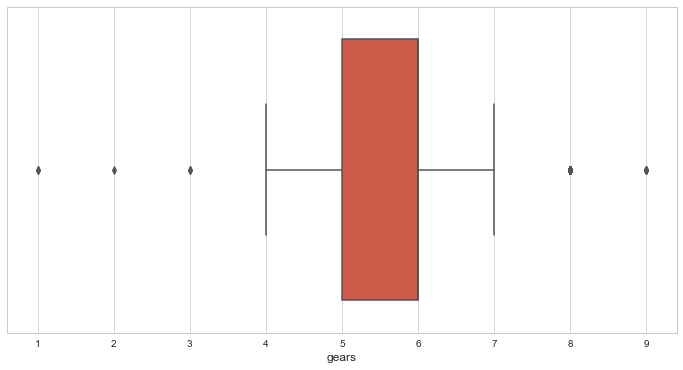

In [286]:
sns.boxplot(x=df.gears);

In [287]:
df['make_model'].value_counts()

Audi A3           3064
Audi A1           2587
Opel Insignia     2570
Opel Astra        2495
Opel Corsa        2164
Renault Clio      1780
Renault Espace     953
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

In [288]:
df['make_model'].replace(to_replace=['Audi A3','Audi A1', 'Opel Insignia', "Opel Astra", 'Opel Corsa', 'Renault Clio', 'Renault Espace', 'Renault Duster', 'Audi A2'],value=[1,2,3,4,5,6,7,8,9], inplace=True)
df['make_model'].value_counts()

1    3064
2    2587
3    2570
4    2495
5    2164
6    1780
7     953
8      34
9       1
Name: make_model, dtype: int64

In [289]:
df.gears.sort_values(ascending = False) # extreme leri üstten alttan gör

15814   9.000
15876   9.000
15812   9.000
15827   9.000
15824   9.000
         ... 
15906     NaN
15908     NaN
15911     NaN
15913     NaN
15918     NaN
Name: gears, Length: 15648, dtype: float64

In [290]:
# def remove_outlier(df_in, col_name):
#     q1 = df_in[col_name].quantile(0.25)
#     q3 = df_in[col_name].quantile(0.75)
#     iqr = q3-q1 #Interquartile range
#     fence_low  = q1-1.5*iqr
#     fence_high = q3+1.5*iqr
#     df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
#     return df_out

In [291]:
df.drop(df.index[df['gears'] == '9'], inplace = True)
df.drop(df.index[df['gears'] == '8'], inplace = True)
df.drop(df.index[df['gears'] == '4'], inplace = True)
df.drop(df.index[df['gears'] == '3'], inplace = True)
df.drop(df.index[df['gears'] == '2'], inplace = True)
df.drop(df.index[df['gears'] == '1'], inplace = True)

### 32 - 'country_version'

In [292]:
# 'country_version'   %52

In [293]:
# df['inspection_new'] = df['inspection_new'].replace(to_replace='NaN', value=np.nan)

## DROPPING few-missing-value ROWs

In [294]:
# df = df.dropna(subset=['stop_time', 'police_department', 'driver_gender'])

## TARIH ARALIKLARI HESAPLARI

### Age (filling the missing values)

In [295]:
df['age'].isnull().sum()

39

In [296]:
for group in list(df["make_model"].unique()):
    cond = df["make_model"]==group
    mode = list(df[cond]["age"].mode())
    if mode != []:
        df.loc[cond, "age"] = df.loc[cond, "age"].fillna(df[cond]["age"].mode()[0])
    else:
        df.loc[cond, "age"] = df.loc[cond, "age"].fillna(df["age"].mode()[0])

In [297]:
df['age'].isnull().sum()

0

### GOOD CODE

In [298]:
# for group in list (df['age'].unique()):
#     cond = df['age'] == group
#     df.loc[cond, 'previous_owners'] = df.loc[cond, 'previous_owners'].fillna(method = "ffill").fillna(method="bfill")
# df['previous_owners'] = df['previou_owners'].fillna(method = "ffill").fillna(method = "bfill")
    

In [299]:
# for group1 in df["make_model"].unique():
#     for group2  in list(df['body_type'].unique):
#         cond2 = (df["make_model"] == group1) & (df["body_type"] == group2)
#         df.loc[cond2, "Paint_Type"] = df.loc[cond2, "Paint_Type"].fillna(method = "ffill").fillna(method = "bfill")
        
# for group1 in list(df["make_model"].unique()):
#     cond1 = df["make_model"] == group1
#     df.loc[cond1, "Paint_Type"] = df.loc[cond1, "Paint_Type"].fillna(method = ""ffill).fillna(method = "bfill")
    
# df["Paint_Type"] = df["Paint_Type"].fillna(method = ""ffill).fillna(method = "bfill")

In [300]:
# df['comfort_&_convenience'].explode()   #liste içinde değilse istendiği gibi göstermiyor
# df['comfort_&_convenience'].apply(pd.Series)   #liste içinde değilse istendiği gibi göstermiyor

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15648 entries, 0 to 15918
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     15648 non-null  int64  
 1   body_type                      15648 non-null  object 
 2   price                          15648 non-null  int64  
 3   vat                            11221 non-null  object 
 4   km                             15648 non-null  int64  
 5   registration                   14086 non-null  object 
 6   prev_owner                     8949 non-null   float64
 7   hp                             15566 non-null  float64
 8   type                           15646 non-null  object 
 9   inspection_new                 3920 non-null   object 
 10  warranty                       4792 non-null   float64
 11  first_registration             14086 non-null  float64
 12  body_color                     15055 non-null 

# ML Missing Value Predictor

### Seperating the Relevant Part of the DataSet

In [302]:
df_ML = df[['km', 'age', 'price', 'make_model', 'age', 'prev_owner']]
df_ML.head()

,km,age,price,make_model,age,prev_owner
0,56013,4.000,15770,2,4.000,2.000
1,80000,3.000,14500,2,3.000,NaN
2,83450,4.000,14640,2,4.000,1.000
3,73000,4.000,14500,2,4.000,1.000
4,16200,4.000,16790,2,4.000,1.000


In [303]:
df_ML.shape

(15648, 6)

### Forming the Test Data

In [304]:
#Seperate the null values to form the TEST data
df_test = df_ML[df_ML['prev_owner'].isnull()]
df_test.isnull().sum()

km               0
age              0
price            0
make_model       0
age              0
prev_owner    6699
dtype: int64

In [305]:
df_test.head()

,km,age,price,make_model,age,prev_owner
1,80000,3.000,14500,2,3.000,NaN
9,16103,3.000,17990,2,3.000,NaN
10,11300,2.000,18500,2,2.000,NaN
13,45764,4.000,18399,2,4.000,NaN
16,9752,2.000,18900,2,2.000,NaN


In [306]:
df_test.shape

(6699, 6)

In [307]:
# Drop the null values to form train data

In [308]:
df_train = df_ML
df_train.dropna(inplace=True)

In [309]:
df_train.shape

(8949, 6)

In [310]:
df_train.head()

,km,age,price,make_model,age,prev_owner
0,56013,4.000,15770,2,4.000,2.000
2,83450,4.000,14640,2,4.000,1.000
3,73000,4.000,14500,2,4.000,1.000
4,16200,4.000,16790,2,4.000,1.000
5,63668,4.000,15090,2,4.000,1.000


In [311]:
df_train.isnull().sum()

km            0
age           0
price         0
make_model    0
age           0
prev_owner    0
dtype: int64

In [312]:
# Train data has no null. Check it!
df_train["prev_owner"].isnull().sum()

0

In [313]:
df_train.shape

(8949, 6)

### Defining the x_train and y_train

In [314]:
y_train = df_train["prev_owner"]
y_train.shape

(8949,)

In [315]:
x_train = df_train.drop("prev_owner", axis=1)

### Building the model

In [316]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [317]:
# Training the model on train data set (x_train, y_train)
lr.fit(x_train, y_train)

LogisticRegression()

### Formin the x_test

In [318]:
# DataSet EXCEPT the df['prev_owner] (target column) with null values
x_test = df_test.drop('prev_owner', axis=1)

In [319]:
x_test

,km,age,price,make_model,age
1,80000,3.000,14500,2,3.000
9,16103,3.000,17990,2,3.000
10,11300,2.000,18500,2,2.000
13,45764,4.000,18399,2,4.000
16,9752,2.000,18900,2,2.000
...,...,...,...,...,...
15909,3500,1.000,39990,7,1.000
15912,0,0.000,39950,7,0.000
15913,1000,1.000,39950,7,1.000
15914,0,0.000,39950,7,0.000


In [320]:
x_test.shape

(6699, 5)

### Applying the MODEL on x_test

In [321]:
y_pred = lr.predict(x_test)

In [322]:
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [323]:
y_pred.shape

(6699,)

### Replacing the Missing Values with the Predicted Values

In [324]:
df_test.loc[df_test['prev_owner'].isnull(), 'prev_owner'] = y_pred

In [325]:
df_test

,km,age,price,make_model,age,prev_owner
1,80000,3.000,14500,2,3.000,1.000
9,16103,3.000,17990,2,3.000,1.000
10,11300,2.000,18500,2,2.000,1.000
13,45764,4.000,18399,2,4.000,1.000
16,9752,2.000,18900,2,2.000,1.000
...,...,...,...,...,...,...
15909,3500,1.000,39990,7,1.000,1.000
15912,0,0.000,39950,7,0.000,1.000
15913,1000,1.000,39950,7,1.000,1.000
15914,0,0.000,39950,7,0.000,1.000


In [326]:
df_test['prev_owner'].value_counts()

1.000    6699
Name: prev_owner, dtype: int64

### Combining the Filled-Null Row Indices into the None-Null Row Indices

In [327]:
df_test

,km,age,price,make_model,age,prev_owner
1,80000,3.000,14500,2,3.000,1.000
9,16103,3.000,17990,2,3.000,1.000
10,11300,2.000,18500,2,2.000,1.000
13,45764,4.000,18399,2,4.000,1.000
16,9752,2.000,18900,2,2.000,1.000
...,...,...,...,...,...,...
15909,3500,1.000,39990,7,1.000,1.000
15912,0,0.000,39950,7,0.000,1.000
15913,1000,1.000,39950,7,1.000,1.000
15914,0,0.000,39950,7,0.000,1.000


In [328]:
df_test['prev_owner'].isnull().sum()

0

In [329]:
df_train

,km,age,price,make_model,age,prev_owner
0,56013,4.000,15770,2,4.000,2.000
2,83450,4.000,14640,2,4.000,1.000
3,73000,4.000,14500,2,4.000,1.000
4,16200,4.000,16790,2,4.000,1.000
5,63668,4.000,15090,2,4.000,1.000
...,...,...,...,...,...,...
15910,8500,1.000,39980,7,1.000,1.000
15911,100,1.000,39980,7,1.000,1.000
15915,9900,1.000,39885,7,1.000,1.000
15916,15,1.000,39875,7,1.000,1.000


In [330]:
df_train['prev_owner'].isnull().sum()

0

In [331]:
# combining the df's with indices
df_Merged = pd.concat([df_train, df_test], axis=0)
df_Merged

,km,age,price,make_model,age,prev_owner
0,56013,4.000,15770,2,4.000,2.000
2,83450,4.000,14640,2,4.000,1.000
3,73000,4.000,14500,2,4.000,1.000
4,16200,4.000,16790,2,4.000,1.000
5,63668,4.000,15090,2,4.000,1.000
...,...,...,...,...,...,...
15909,3500,1.000,39990,7,1.000,1.000
15912,0,0.000,39950,7,0.000,1.000
15913,1000,1.000,39950,7,1.000,1.000
15914,0,0.000,39950,7,0.000,1.000


In [332]:
df_Merged['prev_owner'].isnull().sum()

0

In [333]:
df_Merged.sort_index()

,km,age,price,make_model,age,prev_owner
0,56013,4.000,15770,2,4.000,2.000
1,80000,3.000,14500,2,3.000,1.000
2,83450,4.000,14640,2,4.000,1.000
3,73000,4.000,14500,2,4.000,1.000
4,16200,4.000,16790,2,4.000,1.000
...,...,...,...,...,...,...
15914,0,0.000,39950,7,0.000,1.000
15915,9900,1.000,39885,7,1.000,1.000
15916,15,1.000,39875,7,1.000,1.000
15917,10,1.000,39700,7,1.000,1.000


In [334]:
df.head()

,make_model,body_type,price,vat,km,registration,prev_owner,hp,type,inspection_new,warranty,first_registration,body_color,paint_type,body_color_original,upholstery,nr_of_doors,nr_of_seats,gearing_type,displacement,cylinders,weight,drive_chain,fuel,consumption,co_2_emission,emission_class,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,last_service_date,availability,age,number_of_comfort_convenience,number_of_entertainment_media,number_of_extras,number_of_safety_security
0,2,Sedans,15770,VAT deductible,56013,1461 days,2.000,66.000,Used,True,NaN,2016.000,Black,Metallic,Mythosschwarz,Cloth,5.000,5.000,Automatic,1422.000,3.000,1220.000,front,Benzine,3.800,99,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...","Sicherheit:, ,Deaktivierung für Beifahrer-Airb...",NaN,NaN,NaN,NaN,NaN,4.000,16.000,4.000,3.000,14.000
1,2,Sedans,14500,Price negotiable,80000,1036 days,NaN,141.000,Used,NaN,NaN,2017.000,Red,NaN,NaN,Cloth,3.000,4.000,Automatic,1798.000,4.000,1255.000,front,Benzine,5.600,129,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Langstreckenfahrzeug daher die hohe Kilometerl...,4.000,7.000,NaN,NaN,NaN,3.000,9.000,5.000,4.000,15.000
2,2,Sedans,14640,VAT deductible,83450,1430 days,1.000,85.000,Used,NaN,NaN,2016.000,Black,Metallic,mythosschwarz metallic,Cloth,4.000,4.000,Automatic,1598.000,NaN,NaN,front,Benzine,3.800,99,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...","Fahrzeug-Nummer: AM-95365, ,Ehem. UPE 24.640 E...",4.000,NaN,NaN,NaN,NaN,4.000,13.000,2.000,2.000,12.000
3,2,Sedans,14500,NaN,73000,1248 days,1.000,66.000,Used,NaN,NaN,2016.000,Brown,Metallic,NaN,NaN,3.000,4.000,Automatic,1422.000,3.000,1195.000,NaN,Benzine,3.800,99,Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...","Audi A1: ,- 1e eigenaar ,- Perfecte staat: sch...",NaN,6.000,NaN,NaN,NaN,4.000,16.000,8.000,3.000,14.000
4,2,Sedans,16790,NaN,16200,1340 days,1.000,66.000,Used,True,NaN,2016.000,Black,Metallic,Mythosschwarz Metallic,Cloth,5.000,5.000,Automatic,1422.000,3.000,NaN,front,Benzine,4.100,109,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...","Technik & Sicherheit:,Xenon plus,Klimaautomati...",NaN,NaN,Germany,NaN,NaN,4.000,13.000,7.000,4.000,13.000


In [335]:
df['prev_owner'] = df_Merged['prev_owner']

In [336]:
df.head(10)

,make_model,body_type,price,vat,km,registration,prev_owner,hp,type,inspection_new,warranty,first_registration,body_color,paint_type,body_color_original,upholstery,nr_of_doors,nr_of_seats,gearing_type,displacement,cylinders,weight,drive_chain,fuel,consumption,co_2_emission,emission_class,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,last_service_date,availability,age,number_of_comfort_convenience,number_of_entertainment_media,number_of_extras,number_of_safety_security
0,2,Sedans,15770,VAT deductible,56013,1461 days,2.000,66.000,Used,True,NaN,2016.000,Black,Metallic,Mythosschwarz,Cloth,5.000,5.000,Automatic,1422.000,3.000,1220.000,front,Benzine,3.800,99,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...","Sicherheit:, ,Deaktivierung für Beifahrer-Airb...",NaN,NaN,NaN,NaN,NaN,4.000,16.000,4.000,3.000,14.000
1,2,Sedans,14500,Price negotiable,80000,1036 days,1.000,141.000,Used,NaN,NaN,2017.000,Red,NaN,NaN,Cloth,3.000,4.000,Automatic,1798.000,4.000,1255.000,front,Benzine,5.600,129,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Langstreckenfahrzeug daher die hohe Kilometerl...,4.000,7.000,NaN,NaN,NaN,3.000,9.000,5.000,4.000,15.000
2,2,Sedans,14640,VAT deductible,83450,1430 days,1.000,85.000,Used,NaN,NaN,2016.000,Black,Metallic,mythosschwarz metallic,Cloth,4.000,4.000,Automatic,1598.000,NaN,NaN,front,Benzine,3.800,99,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...","Fahrzeug-Nummer: AM-95365, ,Ehem. UPE 24.640 E...",4.000,NaN,NaN,NaN,NaN,4.000,13.000,2.000,2.000,12.000
3,2,Sedans,14500,NaN,73000,1248 days,1.000,66.000,Used,NaN,NaN,2016.000,Brown,Metallic,NaN,NaN,3.000,4.000,Automatic,1422.000,3.000,1195.000,NaN,Benzine,3.800,99,Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...","Audi A1: ,- 1e eigenaar ,- Perfecte staat: sch...",NaN,6.000,NaN,NaN,NaN,4.000,16.000,8.000,3.000,14.000
4,2,Sedans,16790,NaN,16200,1340 days,1.000,66.000,Used,True,NaN,2016.000,Black,Metallic,Mythosschwarz Metallic,Cloth,5.000,5.000,Automatic,1422.000,3.000,NaN,front,Benzine,4.100,109,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...","Technik & Sicherheit:,Xenon plus,Klimaautomati...",NaN,NaN,Germany,NaN,NaN,4.000,13.000,7.000,4.000,13.000
5,2,Sedans,15090,NaN,63668,1430 days,1.000,85.000,Used,NaN,NaN,2016.000,White,Metallic,NaN,Part leather,4.000,5.000,Automatic,1598.000,NaN,NaN,NaN,Benzine,3.500,92,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Central door lock,Daytime running lights,D...",Sichern Sie sich diesen Audi A1 1.6 TDI Sport ...,4.000,NaN,Germany,NaN,NaN,4.000,17.000,6.000,4.000,14.000
6,2,Station wagon,16422,VAT deductible,62111,1401 days,1.000,85.000,Used,True,NaN,2016.000,White,Metallic,Gletscherweiss,Part leather,4.000,5.000,Automatic,1598.000,4.000,NaN,front,Benzine,3.700,98,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Central door lock,Daytime running lights,D...","REDUZIERT !!!,MwSt. ausweisbar,Nettopreis: 13....",NaN,NaN,Germany,NaN,NaN,4.000,15.000,7.000,4.000,13.000
7,2,Compact,14

# ----------------------------------------------------------------

# FILLING THE REST of the MISSING VALUES

In [337]:
df.head(1)

,make_model,body_type,price,vat,km,registration,prev_owner,hp,type,inspection_new,warranty,first_registration,body_color,paint_type,body_color_original,upholstery,nr_of_doors,nr_of_seats,gearing_type,displacement,cylinders,weight,drive_chain,fuel,consumption,co_2_emission,emission_class,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,last_service_date,availability,age,number_of_comfort_convenience,number_of_entertainment_media,number_of_extras,number_of_safety_security
0,2,Sedans,15770,VAT deductible,56013,1461 days,2.000,66.000,Used,True,NaN,2016.000,Black,Metallic,Mythosschwarz,Cloth,5.000,5.000,Automatic,1422.000,3.000,1220.000,front,Benzine,3.800,99,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...","Sicherheit:, ,Deaktivierung für Beifahrer-Airb...",NaN,NaN,NaN,NaN,NaN,4.000,16.000,4.000,3.000,14.000


In [338]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'registration',
       'prev_owner', 'hp', 'type', 'inspection_new', 'warranty',
       'first_registration', 'body_color', 'paint_type', 'body_color_original',
       'upholstery', 'nr_of_doors', 'nr_of_seats', 'gearing_type',
       'displacement', 'cylinders', 'weight', 'drive_chain', 'fuel',
       'consumption', 'co_2_emission', 'emission_class',
       'comfort_&_convenience', 'entertainment_&_media', 'extras',
       'safety_&_security', 'description', 'emission_label', 'gears',
       'country_version', 'last_service_date', 'availability', 'age',
       'number_of_comfort_convenience', 'number_of_entertainment_media',
       'number_of_extras', 'number_of_safety_security'],
      dtype='object')

In [339]:
df.last_service_date.isnull().sum()

15085

In [340]:
to_drop = ['last_service_date']
df.drop(to_drop, inplace = True, axis = 1)

In [341]:
df

,make_model,body_type,price,vat,km,registration,prev_owner,hp,type,inspection_new,warranty,first_registration,body_color,paint_type,body_color_original,upholstery,nr_of_doors,nr_of_seats,gearing_type,displacement,cylinders,weight,drive_chain,fuel,consumption,co_2_emission,emission_class,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,availability,age,number_of_comfort_convenience,number_of_entertainment_media,number_of_extras,number_of_safety_security
0,2,Sedans,15770,VAT deductible,56013,1461 days,2.000,66.000,Used,True,NaN,2016.000,Black,Metallic,Mythosschwarz,Cloth,5.000,5.000,Automatic,1422.000,3.000,1220.000,front,Benzine,3.800,99,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...","Sicherheit:, ,Deaktivierung für Beifahrer-Airb...",NaN,NaN,NaN,NaN,4.000,16.000,4.000,3.000,14.000
1,2,Sedans,14500,Price negotiable,80000,1036 days,1.000,141.000,Used,NaN,NaN,2017.000,Red,NaN,NaN,Cloth,3.000,4.000,Automatic,1798.000,4.000,1255.000,front,Benzine,5.600,129,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Langstreckenfahrzeug daher die hohe Kilometerl...,4.000,7.000,NaN,NaN,3.000,9.000,5.000,4.000,15.000
2,2,Sedans,14640,VAT deductible,83450,1430 days,1.000,85.000,Used,NaN,NaN,2016.000,Black,Metallic,mythosschwarz metallic,Cloth,4.000,4.000,Automatic,1598.000,NaN,NaN,front,Benzine,3.800,99,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...","Fahrzeug-Nummer: AM-95365, ,Ehem. UPE 24.640 E...",4.000,NaN,NaN,NaN,4.000,13.000,2.000,2.000,12.000
3,2,Sedans,14500,NaN,73000,1248 days,1.000,66.000,Used,NaN,NaN,2016.000,Brown,Metallic,NaN,NaN,3.000,4.000,Automatic,1422.000,3.000,1195.000,NaN,Benzine,3.800,99,Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...","Audi A1: ,- 1e eigenaar ,- Perfecte staat: sch...",NaN,6.000,NaN,NaN,4.000,16.000,8.000,3.000,14.000
4,2,Sedans,16790,NaN,16200,1340 days,1.000,66.000,Used,True,NaN,2016.000,Black,Metallic,Mythosschwarz Metallic,Cloth,5.000,5.000,Automatic,1422.000,3.000,NaN,front,Benzine,4.100,109,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...","Technik & Sicherheit:,Xenon plus,Klimaautomati...",NaN,NaN,Germany,NaN,4.000,13.000,7.000,4.000,13.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,7,Van,39950,VAT deductible,0,NaN,1.000,147.000,New,NaN,24.000,NaN,Grey,Metallic,Grigio scuro,NaN,5.000,5.000,Automatic,1997.000,4.000,1758.000,front,Benzine,5.300,139,NaN,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",Vettura visionabile nella sede in Via Roma 141...,NaN,6.000,NaN,NaN,0.000,20.000,6.000,2.000,19.000
15915,7,Van,39885,VAT deductible,9900,365 days,1.000,165.000,Used,NaN,NaN,2019.000,Grey,Metallic,Stahl-Grau Metallic,Cloth,5.000,5.000,Automatic,1798.000,4.000,1708.000,front,Benzine,NaN,168,NaN,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...","Dach: Panorama-Glas-Schiebedach, Lack

In [342]:
df['registration'] = df['registration'].astype(str)
df['registration'].head()

0    1461 days
1    1036 days
2    1430 days
3    1248 days
4    1340 days
Name: registration, dtype: object

In [343]:
df['registration'] = df['registration'].str.replace(' days', '')
df['registration'].head()

0    1461
1    1036
2    1430
3    1248
4    1340
Name: registration, dtype: object

In [344]:
to_drop = ['first_registration']
df.drop(to_drop, inplace = True, axis = 1)

In [345]:
df

,make_model,body_type,price,vat,km,registration,prev_owner,hp,type,inspection_new,warranty,body_color,paint_type,body_color_original,upholstery,nr_of_doors,nr_of_seats,gearing_type,displacement,cylinders,weight,drive_chain,fuel,consumption,co_2_emission,emission_class,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,availability,age,number_of_comfort_convenience,number_of_entertainment_media,number_of_extras,number_of_safety_security
0,2,Sedans,15770,VAT deductible,56013,1461,2.000,66.000,Used,True,NaN,Black,Metallic,Mythosschwarz,Cloth,5.000,5.000,Automatic,1422.000,3.000,1220.000,front,Benzine,3.800,99,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...","Sicherheit:, ,Deaktivierung für Beifahrer-Airb...",NaN,NaN,NaN,NaN,4.000,16.000,4.000,3.000,14.000
1,2,Sedans,14500,Price negotiable,80000,1036,1.000,141.000,Used,NaN,NaN,Red,NaN,NaN,Cloth,3.000,4.000,Automatic,1798.000,4.000,1255.000,front,Benzine,5.600,129,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Langstreckenfahrzeug daher die hohe Kilometerl...,4.000,7.000,NaN,NaN,3.000,9.000,5.000,4.000,15.000
2,2,Sedans,14640,VAT deductible,83450,1430,1.000,85.000,Used,NaN,NaN,Black,Metallic,mythosschwarz metallic,Cloth,4.000,4.000,Automatic,1598.000,NaN,NaN,front,Benzine,3.800,99,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...","Fahrzeug-Nummer: AM-95365, ,Ehem. UPE 24.640 E...",4.000,NaN,NaN,NaN,4.000,13.000,2.000,2.000,12.000
3,2,Sedans,14500,NaN,73000,1248,1.000,66.000,Used,NaN,NaN,Brown,Metallic,NaN,NaN,3.000,4.000,Automatic,1422.000,3.000,1195.000,NaN,Benzine,3.800,99,Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...","Audi A1: ,- 1e eigenaar ,- Perfecte staat: sch...",NaN,6.000,NaN,NaN,4.000,16.000,8.000,3.000,14.000
4,2,Sedans,16790,NaN,16200,1340,1.000,66.000,Used,True,NaN,Black,Metallic,Mythosschwarz Metallic,Cloth,5.000,5.000,Automatic,1422.000,3.000,NaN,front,Benzine,4.100,109,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...","Technik & Sicherheit:,Xenon plus,Klimaautomati...",NaN,NaN,Germany,NaN,4.000,13.000,7.000,4.000,13.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,7,Van,39950,VAT deductible,0,nan,1.000,147.000,New,NaN,24.000,Grey,Metallic,Grigio scuro,NaN,5.000,5.000,Automatic,1997.000,4.000,1758.000,front,Benzine,5.300,139,NaN,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",Vettura visionabile nella sede in Via Roma 141...,NaN,6.000,NaN,NaN,0.000,20.000,6.000,2.000,19.000
15915,7,Van,39885,VAT deductible,9900,365,1.000,165.000,Used,NaN,NaN,Grey,Metallic,Stahl-Grau Metallic,Cloth,5.000,5.000,Automatic,1798.000,4.000,1708.000,front,Benzine,NaN,168,NaN,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...","Dach: Panorama-Glas-Schiebedach, Lackierung: M...",NaN,7.000,Germany,5.000,1.000,23.000,5.000,3.000,19.000
15916,7,Van,39875,VAT deductible,15,306,1

In [346]:
df.shape

(15648, 40)

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15648 entries, 0 to 15918
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     15648 non-null  int64  
 1   body_type                      15648 non-null  object 
 2   price                          15648 non-null  int64  
 3   vat                            11221 non-null  object 
 4   km                             15648 non-null  int64  
 5   registration                   15648 non-null  object 
 6   prev_owner                     15648 non-null  float64
 7   hp                             15566 non-null  float64
 8   type                           15646 non-null  object 
 9   inspection_new                 3920 non-null   object 
 10  warranty                       4792 non-null   float64
 11  body_color                     15055 non-null  object 
 12  paint_type                     10036 non-null 

# SAYISALLAŞTIRMA

In [348]:
df['vat'].value_counts()

VAT deductible      10801
Price negotiable      420
Name: vat, dtype: int64

In [349]:
df['vat'].astype(str)

0          VAT deductible
1        Price negotiable
2          VAT deductible
3                     nan
4                     nan
               ...       
15914      VAT deductible
15915      VAT deductible
15916      VAT deductible
15917      VAT deductible
15918      VAT deductible
Name: vat, Length: 15648, dtype: object

In [350]:
df['vat']= df['vat'].replace(to_replace=['VAT deductible','Price negotiable'], value=[1,2])
df['vat'].value_counts()

1.000    10801
2.000      420
Name: vat, dtype: int64

# --------------------------------

In [351]:
df['body_color'].isnull().sum()

593

In [352]:
df['body_color'].astype(str)

0        Black
1          Red
2        Black
3        Brown
4        Black
         ...  
15914     Grey
15915     Grey
15916    White
15917     Grey
15918     Grey
Name: body_color, Length: 15648, dtype: object

In [353]:
df['body_color']= df['body_color'].replace(to_replace=['Black', 'Grey', 'White', 'Silver', 'Blue', 'Red', 'Brown', 'Green', 'Beige', 'Yellow', 'Violet', 'Bronze', 'Orange', 'Gold'], value=[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
df['body_color'].value_counts()

1.000     3697
2.000     3444
3.000     3301
4.000     1635
5.000     1413
6.000      944
7.000      288
8.000      153
9.000      101
10.000      51
11.000      17
12.000       6
13.000       3
14.000       2
Name: body_color, dtype: int64

# --------------------------------

In [354]:
df['body_color_original'].value_counts()

Onyx Schwarz                     337
Bianco                           234
Mythosschwarz Metallic           230
Brillantschwarz                  216
Quarz Grau                       200
                                ... 
White & Black                      1
BLAU                               1
Schneeweiss / Dach Schwarz         1
Premium Tiefsee Blau               1
Perlmutt-Weiß Metallic (Weiß)      1
Name: body_color_original, Length: 1912, dtype: int64

In [355]:
to_drop = ['body_color_original']
df.drop(to_drop, inplace = True, axis = 1)

# --------------------------------

In [356]:
df['type'].value_counts()

Used              10874
New                1626
Pre-registered     1356
Employee's car     1009
Demonstration       781
Name: type, dtype: int64

In [357]:
df['type'].astype(str)

0                  Used
1                  Used
2                  Used
3                  Used
4                  Used
              ...      
15914               New
15915              Used
15916    Pre-registered
15917    Pre-registered
15918     Demonstration
Name: type, Length: 15648, dtype: object

In [358]:
df['type']= df['type'].replace(to_replace=['Used', 'New', 'Pre-registered', "Employee's car", 'Demonstration'], value=[1,2,3,4,5])
df['type'].value_counts()

1.000    10874
2.000     1626
3.000     1356
4.000     1009
5.000      781
Name: type, dtype: int64

# --------------------------------

In [359]:
df['paint_type'].value_counts()

Metallic       9693
Uni/basic       338
Perl effect       5
Name: paint_type, dtype: int64

In [360]:
df['paint_type'].astype(str)

0        Metallic
1             nan
2        Metallic
3        Metallic
4        Metallic
           ...   
15914    Metallic
15915    Metallic
15916         nan
15917         nan
15918    Metallic
Name: paint_type, Length: 15648, dtype: object

In [361]:
df['paint_type']= df['paint_type'].replace(to_replace=['Metallic', 'Uni/basic', 'Perl effect'], value=[1,2,3])
df['paint_type'].value_counts()

1.000    9693
2.000     338
3.000       5
Name: paint_type, dtype: int64

# --------------------------------

In [362]:
df['drive_chain'].value_counts()

front    8842
4WD       171
rear        4
Name: drive_chain, dtype: int64

In [363]:
df['drive_chain'].astype(str)

0        front
1        front
2        front
3          nan
4        front
         ...  
15914    front
15915    front
15916    front
15917    front
15918      4WD
Name: drive_chain, Length: 15648, dtype: object

In [364]:
df['drive_chain']= df['drive_chain'].replace(to_replace=['front', '4WD', 'rear'], value=[1,2,3])
df['drive_chain'].value_counts()

1.000    8842
2.000     171
3.000       4
Name: drive_chain, dtype: int64

# --------------------------------

In [365]:
df['body_type'].value_counts()

Sedans           7782
Station wagon    3519
Compact          3115
Van               772
Other             286
Transporter        87
Off-Road           55
Coupe              24
Convertible         8
Name: body_type, dtype: int64

In [366]:
df['body_type'].astype(str)

0        Sedans
1        Sedans
2        Sedans
3        Sedans
4        Sedans
          ...  
15914       Van
15915       Van
15916       Van
15917       Van
15918       Van
Name: body_type, Length: 15648, dtype: object

In [367]:
df['body_type']= df['body_type'].replace(to_replace=['Sedans', 'Station wagon', 'Compact', 'Van', 'Other', 'Transporter', 'Off-Road', 'Coupe', 'Convertible'], value=[1,2,3,4,5,6,7,8,9])
df['body_type'].value_counts()

1    7782
2    3519
3    3115
4     772
5     286
6      87
7      55
8      24
9       8
Name: body_type, dtype: int64

# --------------------------------

In [368]:
df['gearing_type'].value_counts()

Manual            7995
Automatic         7184
Semi-automatic     469
Name: gearing_type, dtype: int64

In [369]:
df['gearing_type'].astype(str)

0        Automatic
1        Automatic
2        Automatic
3        Automatic
4        Automatic
           ...    
15914    Automatic
15915    Automatic
15916    Automatic
15917    Automatic
15918    Automatic
Name: gearing_type, Length: 15648, dtype: object

In [370]:
df['gearing_type']= df['gearing_type'].replace(to_replace=['Manual', 'Automatic', 'Semi-automatic'], value=[1,2,3])
df['gearing_type'].value_counts()

1    7995
2    7184
3     469
Name: gearing_type, dtype: int64

# --------------------------------

In [371]:
df['fuel'].value_counts()

Benzine     12759
Diesel       2825
LPG/CNG        59
Electric        5
Name: fuel, dtype: int64

In [372]:
df['fuel'].astype(str)

0        Benzine
1        Benzine
2        Benzine
3        Benzine
4        Benzine
          ...   
15914    Benzine
15915    Benzine
15916     Diesel
15917     Diesel
15918    Benzine
Name: fuel, Length: 15648, dtype: object

In [373]:
df['fuel']= df['fuel'].replace(to_replace=['Benzine', 'Diesel', 'LPG/CNG', 'Electric'], value=[1,2,3, 4])
df['fuel'].value_counts()

1    12759
2     2825
3       59
4        5
Name: fuel, dtype: int64

# --------------------------------

In [374]:
df['emission_class'].value_counts()

Euro 6          10089
Euro 6d-TEMP     1837
Euro 6c           124
Euro 5             78
Euro 6d            62
Euro 4             38
Name: emission_class, dtype: int64

In [375]:
df['emission_class'].astype(str)

0              Euro 6
1              Euro 6
2              Euro 6
3              Euro 6
4              Euro 6
             ...     
15914             nan
15915             nan
15916    Euro 6d-TEMP
15917          Euro 6
15918          Euro 6
Name: emission_class, Length: 15648, dtype: object

In [376]:
df['emission_class']= df['emission_class'].replace(to_replace=['Euro 6', 'Euro 6d-TEMP', 'Euro 6c', 'Euro 5', 'Euro 6d', 'Euro 4'], value=[1,2,3,4,5,6])
df['emission_class'].value_counts()

1.000    10089
2.000     1837
3.000      124
4.000       78
5.000       62
6.000       38
Name: emission_class, dtype: int64

# --------------------------------

In [377]:
df['emission_label'].value_counts()

4.000    3535
1.000     377
5.000       8
3.000       2
2.000       1
Name: emission_label, dtype: int64

In [378]:
df['emission_label'].astype(str)

0        nan
1        4.0
2        4.0
3        nan
4        nan
        ... 
15914    nan
15915    nan
15916    nan
15917    nan
15918    4.0
Name: emission_label, Length: 15648, dtype: object

In [379]:
df['emission_label']= df['emission_label'].replace(to_replace=['Green', 'No sticker', 'Blue', 'Yellow', 'Red'], value=[1,2,3,4,5])
df['emission_label'].value_counts()

4.000    3535
1.000     377
5.000       8
3.000       2
2.000       1
Name: emission_label, dtype: int64

# --------------------------------

In [380]:
df['country_version'].value_counts()

Germany           4478
Italy             1029
European Union     506
Netherlands        464
Spain              325
Belgium            312
Austria            203
Czech Republic      52
Poland              49
France              36
Denmark             33
Hungary             28
Japan                8
Slovakia             4
Croatia              4
Sweden               3
Romania              2
Bulgaria             2
Luxembourg           1
Switzerland          1
Slovenia             1
Egypt                1
Serbia               1
Name: country_version, dtype: int64

In [381]:
df['country_version'].astype(str)

0            nan
1            nan
2            nan
3            nan
4        Germany
          ...   
15914        nan
15915    Germany
15916    Austria
15917        nan
15918    Germany
Name: country_version, Length: 15648, dtype: object

In [382]:
df['country_version']= df['country_version'].replace(to_replace=['Serbia', 'Egypt', 'Slovenia', 'Switzerland', 'Luxembourg', 'Bulgaria', 'Romania', 'Sweden', 'Croatia', 'Slovakia', 'Japan', 'Hungary', 'Denmark', 'France', 'Poland', 'Czech Republic', 'Austria', 'Belgium', 'Spain', 'Netherlands', 'European Union', 'Italy', 'Germany'], value=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20, 21,22,23])
df['country_version'].value_counts()

23.000    4478
22.000    1029
21.000     506
20.000     464
19.000     325
18.000     312
17.000     203
16.000      52
15.000      49
14.000      36
13.000      33
12.000      28
11.000       8
10.000       4
9.000        4
8.000        3
7.000        2
6.000        2
5.000        1
4.000        1
3.000        1
2.000        1
1.000        1
Name: country_version, dtype: int64

# --------------------------------

In [383]:
df['upholstery'].value_counts()

Cloth           8362
Part leather    1494
Full leather    1001
Other            366
Velour            58
alcantara         57
Name: upholstery, dtype: int64

In [384]:
df['upholstery'].astype(str)

0               Cloth
1               Cloth
2               Cloth
3                 nan
4               Cloth
             ...     
15914             nan
15915           Cloth
15916    Full leather
15917    Part leather
15918    Full leather
Name: upholstery, Length: 15648, dtype: object

In [385]:
df['upholstery']= df['upholstery'].replace(to_replace=['Cloth', 'Part leather', 'Full leather', 'Other', 'Velour', 'alcantara'], value=[1,2,3,4,5,6])
df['upholstery'].value_counts()

1.000    8362
2.000    1494
3.000    1001
4.000     366
5.000      58
6.000      57
Name: upholstery, dtype: int64

# --------------------------------

In [386]:
df.head()

,make_model,body_type,price,vat,km,registration,prev_owner,hp,type,inspection_new,warranty,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,displacement,cylinders,weight,drive_chain,fuel,consumption,co_2_emission,emission_class,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,availability,age,number_of_comfort_convenience,number_of_entertainment_media,number_of_extras,number_of_safety_security
0,2,1,15770,1.000,56013,1461,2.000,66.000,1.000,True,NaN,1.000,1.000,1.000,5.000,5.000,2,1422.000,3.000,1220.000,1.000,1,3.800,99,1.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...","Sicherheit:, ,Deaktivierung für Beifahrer-Airb...",NaN,NaN,NaN,NaN,4.000,16.000,4.000,3.000,14.000
1,2,1,14500,2.000,80000,1036,1.000,141.000,1.000,NaN,NaN,6.000,NaN,1.000,3.000,4.000,2,1798.000,4.000,1255.000,1.000,1,5.600,129,1.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Langstreckenfahrzeug daher die hohe Kilometerl...,4.000,7.000,NaN,NaN,3.000,9.000,5.000,4.000,15.000
2,2,1,14640,1.000,83450,1430,1.000,85.000,1.000,NaN,NaN,1.000,1.000,1.000,4.000,4.000,2,1598.000,NaN,NaN,1.000,1,3.800,99,1.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...","Fahrzeug-Nummer: AM-95365, ,Ehem. UPE 24.640 E...",4.000,NaN,NaN,NaN,4.000,13.000,2.000,2.000,12.000
3,2,1,14500,NaN,73000,1248,1.000,66.000,1.000,NaN,NaN,7.000,1.000,NaN,3.000,4.000,2,1422.000,3.000,1195.000,NaN,1,3.800,99,1.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...","Audi A1: ,- 1e eigenaar ,- Perfecte staat: sch...",NaN,6.000,NaN,NaN,4.000,16.000,8.000,3.000,14.000
4,2,1,16790,NaN,16200,1340,1.000,66.000,1.000,True,NaN,1.000,1.000,1.000,5.000,5.000,2,1422.000,3.000,NaN,1.000,1,4.100,109,1.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...","Technik & Sicherheit:,Xenon plus,Klimaautomati...",NaN,NaN,23.000,NaN,4.000,13.000,7.000,4.000,13.000


In [387]:
df.to_csv('scoutPART3-ReadyforMLMissingPrediction.csv', index=False)